# Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# AdaLiNe init

In [2]:
class AdaLiNe:
    def __init__(self):
        self.__activator = self.__reapeater
        self.__quantizer = self.__unit_step
        self.fit = self.__gs
        self.cost_per_iter = []

    def predict(self,X):
        return self.__quantizer(self.__activator(self.__net_input(X)))

    def __net_input(self,X):
        return X.dot(self._weights) + self._bias
    
    def __reapeater(self,X):
        return X
    
    def __unit_step(self,X):
        return np.where(X < 0, -1, 1)
    
    def get_params(self):
        return (self._bias,self._weights.copy())
    
    def __params_init(self,params_count,init_method):
        if init_method == 'rnd':
            self._weights = np.random.normal(loc=0.0,scale=0.2,size=(params_count,1))
            self._bias =  np.random.normal(loc=0.0,scale=0.2)
        else:
            self._weights = np.zeros((params_count,1))
            self._bias =0

    # X - matrix that represents train samples
    # y - lables for train samples
    # a - learning rate
    def __gs(self,X,y,a,error_threshold):
        max_iter = 100
        self.cost_per_iter = []
        i = 0
        repeat = True
        (n,m)=X.shape
        e = np.ones(shape=(1,n))
        self.__params_init(m,'')
        while repeat and i < max_iter:
            error = (y - self.__reapeater(self.__net_input(X)))
            delta_weights = a * (X.T).dot(error)
            delta_bias = a * error.sum()
            self._weights += delta_weights
            self._bias += delta_bias
            i+=1
            cost = (error**2).sum()/2.0
            self.cost_per_iter.append(cost)
            try:
                sum_error = (delta_bias.item(0)**2 + (delta_weights**2).sum().item(0))
            except:
                sum_error = 1
            if sum_error < error_threshold:
                repeat = False
        return i

# Data

## Functions

In [3]:
def preprocess_data(df_X):
    df_X.sort_values(by=['class'])
    df_X = df_X[:100]
    dictionary = {'class' : dict(zip(df_X['class'].unique(),[-1,1]))}
    return df_X.replace(dictionary)

In [4]:
def standardize(X):
    (n,_) = X.shape
    mean = X.mean(axis = 0)
    sd = ((X - mean)**2).mean(axis = 0)**0.5
    X -=mean
    X /= sd
    return X

## Read and preprocess

In [5]:
df_X = preprocess_data(pd.read_csv('iris.csv'))
df_X.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,-1
1,4.9,3.0,1.4,0.2,-1
2,4.7,3.2,1.3,0.2,-1
3,4.6,3.1,1.5,0.2,-1
4,5.0,3.6,1.4,0.2,-1


### My sample split

X = df_X_test.values[:,:4]
y = df_X_test['class'].values.reshape((-1,1))

### Sample sklearn split

In [6]:
X = df_X.values[:,:4]
y = df_X['class'].values.reshape((-1,1))

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)
X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=0)

# Learning experiments

In [8]:
learning_rates = [0.1,0.001,0.0001,0.00001]
error_rate = float(0.0001)

## Training - 1

In [9]:
n1 = AdaLiNe()
n2 = AdaLiNe()
n3 = AdaLiNe()
n4 = AdaLiNe()
neurons = [n1,n2,n3,n4]

In [10]:
iterations = [n.fit(X_train,y_train,a,error_rate) for a,n in zip(learning_rates,neurons)]

c:\users\lewa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in square
c:\users\lewa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in square


In [11]:
b = []
w = []
for n in neurons:
    (bi,wi) = n.get_params()
    b.append(bi.item(0))
    w.append(wi)

In [12]:
accuracy_train = [accuracy_score(y_train,n.predict(X_train)) for n in neurons]

In [13]:
accuracy_validation = [accuracy_score(y_validation,n.predict(X_validation)) for n in neurons]

In [14]:
train_dict = {'iterations':iterations,'bias':b,'weights':w,'train_accuracy':accuracy_train,'validation_accuracy':accuracy_validation,'learning rate':learning_rates}
train_df = pd.DataFrame(train_dict,index=['n1','n2','n3','n4'])

### Experiment - 1 result:

Options: 
    index = learning rate
    data is not standardized

In [15]:
train_df

,iterations,bias,weights,train_accuracy,validation_accuracy,learning rate
n1,100,-1.236352e+262,"[[-6.83630944105927e+262], [-3.810060526004442...",0.522222,0.4,0.10000
n2,100,-1.521245e+51,"[[-8.411599686752869e+51], [-4.688012472718400...",0.522222,0.4,0.00100
n3,13,-1.132881e-02,"[[-0.01385063591291926], [-0.06928526815278946...",1.000000,1.0,0.00010
n4,1,-4.000000e-05,"[[0.00019300000000000008], [-0.000417000000000...",0.477778,0.6,0.00001


### Demonstration of how gradient descient minimize cost during each iteration

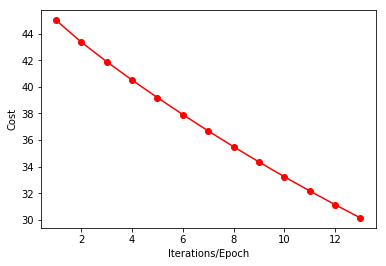

In [16]:
ycost = n3.cost_per_iter
xlin = np.linspace(1, len(ycost), num=len(ycost))
plt.plot(xlin,ycost,'ro-')
plt.xlabel('Iterations/Epoch')
plt.ylabel('Cost')
plt.show()

## Training - 2

Options: 
    index = learning rate
    data is standardized

### Standartization

In [17]:
X_train = standardize(X_train)
X_validation = standardize(X_validation)

### Train

In [18]:
iterations = [n.fit(X_train,y_train,a,error_rate) for a,n in zip(learning_rates,neurons)]

In [19]:
b = []
w = []
for n in neurons:
    (bi,wi) = n.get_params()
    b.append(bi.item(0))
    w.append(wi)

In [20]:
accuracy_train = [accuracy_score(y_train,n.predict(X_train)) for n in neurons]

In [21]:
accuracy_validation = [accuracy_score(y_validation,n.predict(X_validation)) for n in neurons]

In [22]:
train_dict = {'iterations':iterations,'bias':b,'weights':w,'train_accuracy':accuracy_train,'validation_accuracy':accuracy_validation,'learning rate':learning_rates}
train_df = pd.DataFrame(train_dict,index=['n1','n2','n3','n4'])

### Experiment - 2 result:

In [23]:
train_df

,iterations,bias,weights,train_accuracy,validation_accuracy,learning rate
n1,100,1.434246e+126,"[[-2.2626213750699722e+141], [1.73597359483815...",0.0,0.0,0.10000
n2,11,-2.869473e-02,"[[0.19739847125812085], [-0.23521620745161317]...",1.0,1.0,0.00100
n3,17,-6.331754e-03,"[[0.08837822004296109], [-0.08496253007827768]...",1.0,1.0,0.00010
n4,1,-4.000000e-05,"[[0.0006557115605197043], [-0.0006098259575796...",1.0,1.0,0.00001


### GD with standardized data 

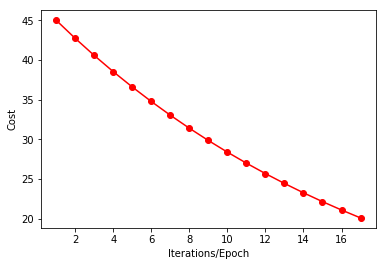

In [24]:
ycost = n3.cost_per_iter
xlin = np.linspace(1, len(ycost), num=len(ycost))
plt.plot(xlin,ycost,'ro-')
plt.xlabel('Iterations/Epoch')
plt.ylabel('Cost')
plt.show()

# Prediction test samples

In [25]:
X_test = standardize(X_test)

In [26]:
prediction = n3.predict(X_test)

In [27]:
print('class:\n{0}'.format(y_test.T))
print('prediction:\n{0}'.format(prediction.T))
print('accuracy: {0}%'.format(accuracy_score(y_test,prediction)))

class:
[[-1  1  1  1  1]]
prediction:
[[-1  1  1  1  1]]
accuracy: 1.0%


# Experiment on non-linear divided classes

In [28]:
def preprocess_data(df_X):
    df_X = df_X[50:150]
    dictionary = {'class' : dict(zip(df_X['class'].unique(),[-1,1]))}
    return df_X.replace(dictionary)

In [29]:
df = preprocess_data(pd.read_csv('iris.csv'))

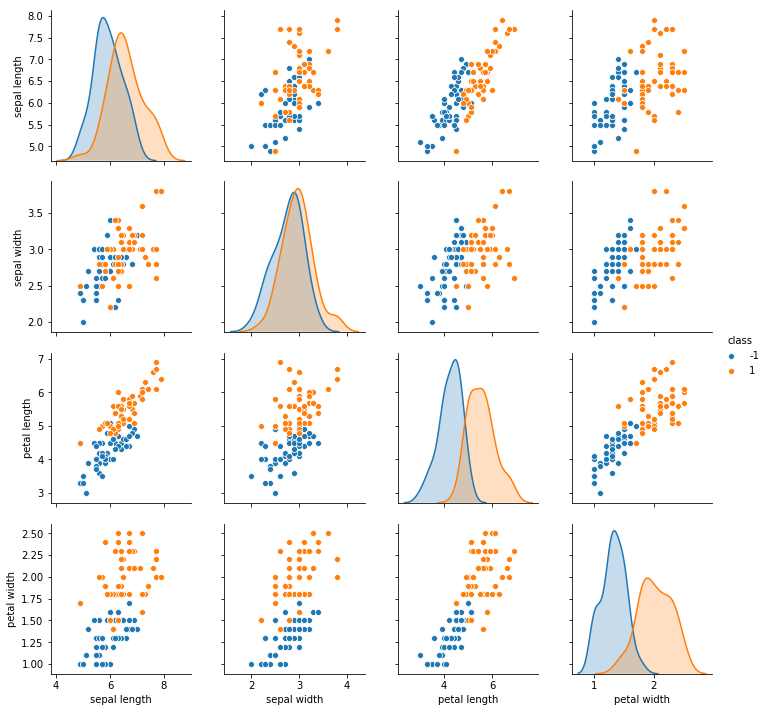

In [30]:
sns.pairplot(df,vars=['sepal length','sepal width','petal length','petal width'],hue='class')
plt.show()

## Select non linear

In [31]:
X = df[['sepal length','sepal width']].values
y = df['class'].values

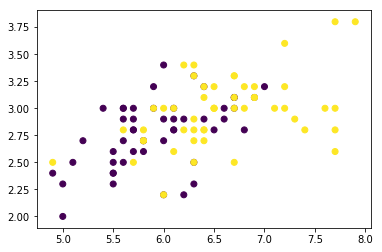

In [32]:
plt.scatter(df['sepal length'].values,df['sepal width'],c=y)
plt.show()

## Let's train

In [33]:
X = standardize(X)

In [34]:
n = AdaLiNe()

In [35]:
print('iterations =',n.fit(X,y.reshape(-1,1),0.001,0.00001))

iterations = 33


In [36]:
b,w = n.get_params()

In [37]:
b

6.483702463810914e-17

In [38]:
w

array([[0.41963169],
       [0.09478959]])

## Prediction

In [39]:
y_pred = n.predict(X)

In [40]:
### Accuracy

In [41]:
accuracy_score(y,y_pred)

0.74

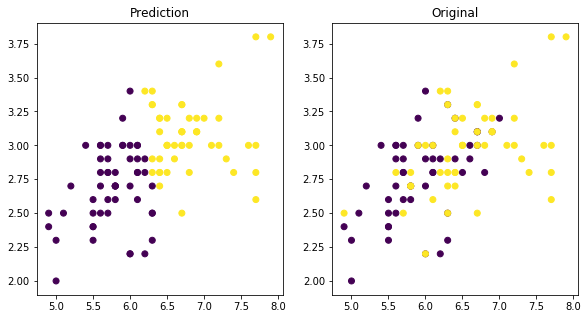

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(131).set_title('Prediction')
plt.scatter(df['sepal length'].values,df['sepal width'],c=y_pred.ravel())
plt.subplot(132).set_title('Original')
plt.scatter(df['sepal length'].values,df['sepal width'],c=y)
plt.show()